In [1]:
import os
import subprocess

geomstats_gitroot_path = subprocess.check_output(
    ['git', 'rev-parse', '--show-toplevel'],
    universal_newlines=True)

os.chdir(geomstats_gitroot_path[:-1])

print('Working directory: ', os.getcwd())

Working directory:  /home/curt/projects/python-first


In [2]:
import geomstats.backend as gs

gs.random.seed(2020)

INFO: Using numpy backend


In [3]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

/home/curt/.pyenv/versions/3.8.9/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


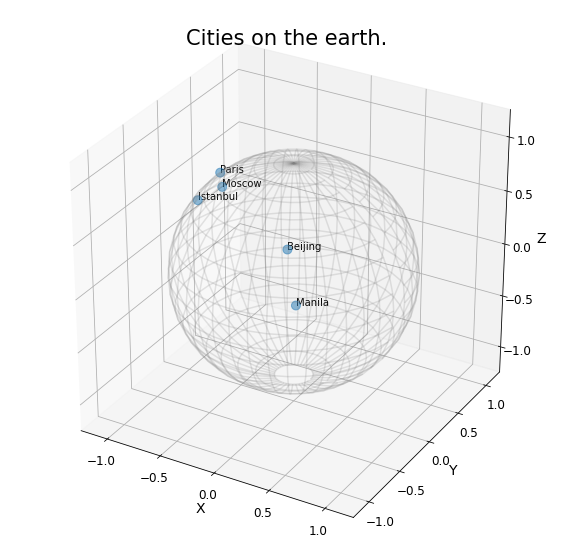

In [4]:
import geomstats.datasets.utils as data_utils

data, names = data_utils.load_cities()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(data[15:20], ax=ax, space='S2', label=names[15:20], s=80, alpha=0.5)

ax.set_title('Cities on the earth.');

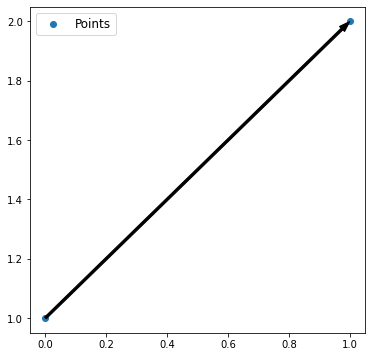

In [5]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

point_a = gs.array([0, 1])
point_b = gs.array([1, 2])
vector = point_b - point_a

ax.scatter(point_a, point_b, label='Points')
ax.arrow(gs.to_numpy(point_a[0]), gs.to_numpy(point_a[1]),
         dx=gs.to_numpy(vector[0]), dy=gs.to_numpy(vector[1]),
         width=0.008, length_includes_head=True, color='black')

ax.legend();

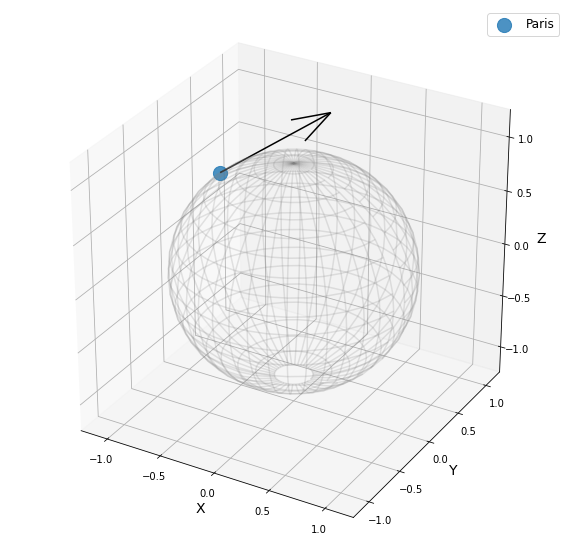

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

paris = data[19]
vector = gs.array([1, 0, 0.8])

ax = visualization.plot(paris, ax=ax, space='S2', s=200, alpha=0.8, label='Paris')

arrow = visualization.Arrow3D(paris, vector=vector)
arrow.draw(ax, color='black')
ax.legend();

## From addition to exponential map

In [7]:
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

paris = data[19]
vector = gs.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=paris)

result = sphere.metric.exp(tangent_vector, base_point=paris)

geodesic = sphere.metric.geodesic(
        initial_point=paris,
        initial_tangent_vec=tangent_vector)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))

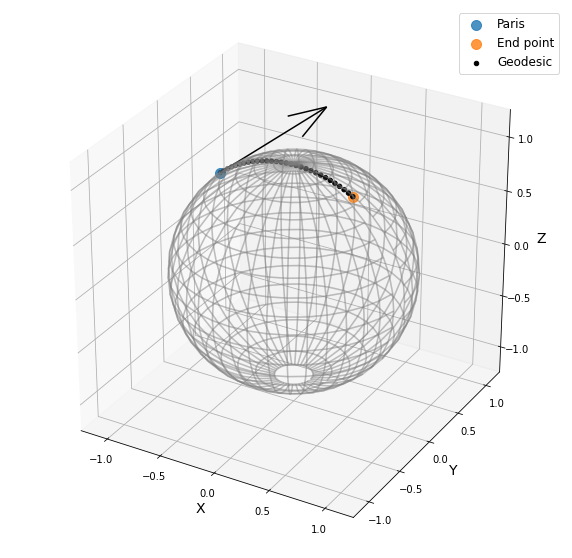

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Paris')
ax = visualization.plot(result, ax=ax, space='S2', s=100, alpha=0.8, label='End point')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic')

arrow = visualization.Arrow3D(paris, vector=tangent_vector)
arrow.draw(ax, color='black')
ax.legend();

## From substraction to logarithm map

In [9]:
paris = data[19]
beijing = data[15]

log = sphere.metric.log(point=beijing, base_point=paris)

geodesic = sphere.metric.geodesic(
        initial_point=paris,
        end_point=beijing)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))

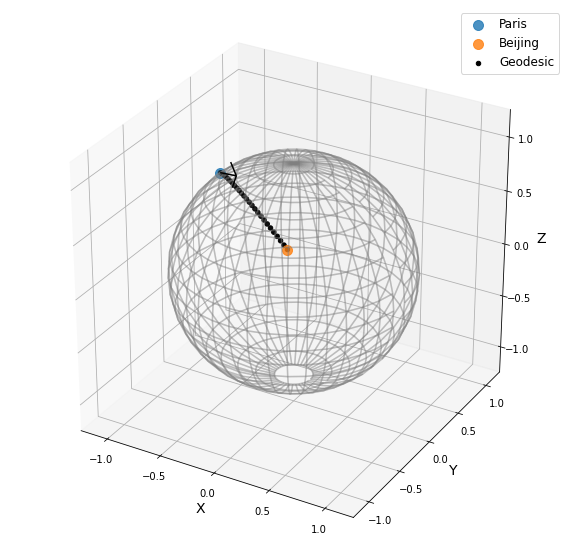

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Paris')
ax = visualization.plot(beijing, ax=ax, space='S2', s=100, alpha=0.8, label='Beijing')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic')

arrow = visualization.Arrow3D(paris, vector=log)
arrow.draw(ax, color='black')
ax.legend();

# Geodesics on the hyperbolic plane

In [11]:
from geomstats.geometry.hyperboloid import Hyperboloid

hyperbolic = Hyperboloid(dim=2, coords_type='extrinsic')

initial_point = gs.array([gs.sqrt(2.), 1., 0.])
end_point = gs.array([2.5, 2.5])
end_point = hyperbolic.from_coordinates(end_point, 'intrinsic')

geodesic = hyperbolic.metric.geodesic(
    initial_point=initial_point, end_point=end_point)

points = geodesic(gs.linspace(0., 1., 10))

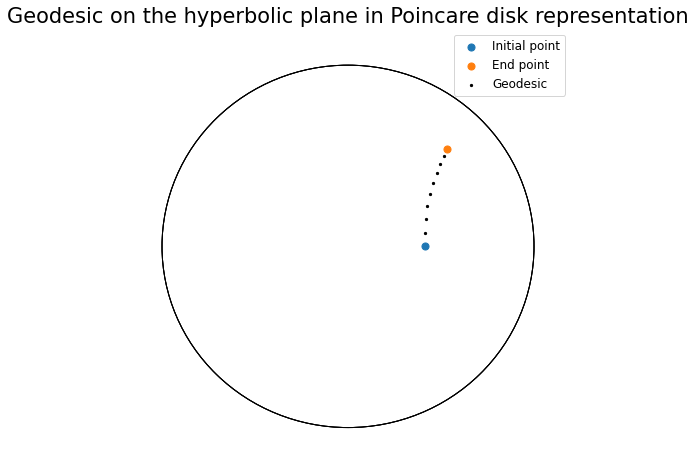

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

representation = 'H2_poincare_disk'

ax = visualization.plot(
    initial_point, ax=ax, space=representation, s=50, label='Initial point');
ax = visualization.plot(
    end_point, ax=ax, space=representation, s=50, label='End point');

ax = visualization.plot(
    points[1:-1], ax=ax, space=representation, s=5, color='black', label='Geodesic');
ax.set_title('Geodesic on the hyperbolic plane in Poincare disk representation')
ax.legend();

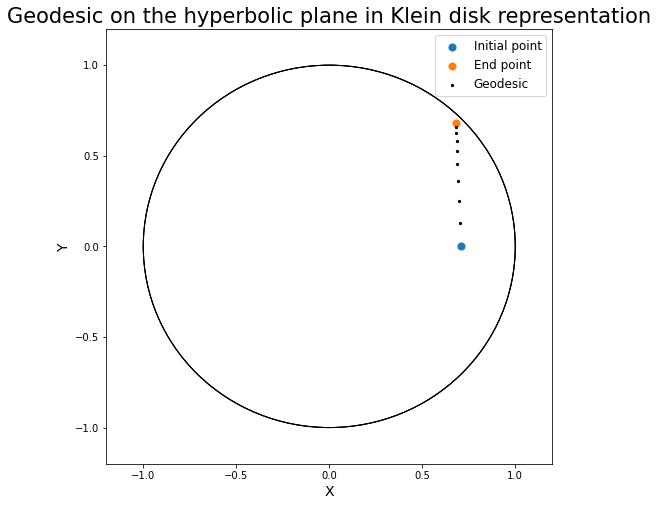

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

representation = 'H2_klein_disk'

ax = visualization.plot(
    initial_point, ax=ax, space=representation, s=50, label='Initial point');
ax = visualization.plot(
    end_point, ax=ax, space=representation, s=50, label='End point');

ax = visualization.plot(
    points[1:-1], ax=ax, space=representation, s=5, color='black', label='Geodesic');
ax.set_title('Geodesic on the hyperbolic plane in Klein disk representation')
ax.legend();

# Geodecics on the special euclidean group SE(3)

In [14]:
from geomstats.geometry.special_euclidean import SpecialEuclidean

se3 = SpecialEuclidean(n=3, point_type='vector')
metric = se3.left_canonical_metric

initial_point = se3.identity
initial_tangent_vec = gs.array([1.8, 0.2, 0.3, 3., 3., 1.])
geodesic = metric.geodesic(
    initial_point=initial_point,
    initial_tangent_vec=initial_tangent_vec)

points = geodesic(gs.linspace(-3., 3., 40))

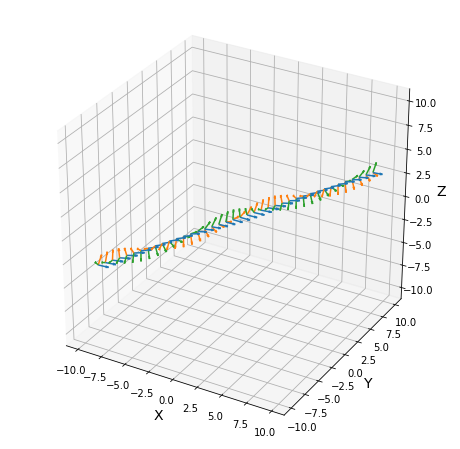

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(points, ax=ax, space='SE3_GROUP');